# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://i0.wp.com/sejaevo.blog/wp-content/uploads/2018/07/fraude-com-cartao.jpg?resize=1080%2C624&ssl=1" width="70%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

# O que é **redução de dimensionalidade**?
### A redução de dimensionalidade é uma técnica utilizada para reduzir o número de variáveis (Features) em um conjunto de dados, ao mesmo tempo que se preserva o máximo de informação útil possível. É especialmente usada em grandes conjuntos de dados para facilitar o processamento e melhorar a performance de algoritmos de aprendizado de máquina. Por exemplo, esse dataset tinha mais de 1000 características, após a redução de dimensionalidade , esse número caiu para apenas 31, mantendo a maioria das informações importantes.
## O que é **PCA**?
### PCA é um método para executar uma redução de dimensionalidade, existem diversas formas de reduzir a dimensionalidade de um conjunto de dados, no caso do PCA, ele reduz o numero de variáveis por meio da transformação de diversas variáveis em algo novo,chamado de componente, esses componentes visam "representar" muitas variaveis, isso diminui e muito o número de variáveis, porém, em contrapartida, um ponto negativo desse método é que as novas variáveis se tornam de muito dificil compreensão, pois elas são apenas o resultado de múltiplas combinações lineares das variáveis anteriores.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Essa análise exploratória aborda:

* as 5 primeiras entradas
* o resumo estatístico do dataframe
* Verifica se há valores ausentes
* Plota um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plota diversos graficos buscando tendências
* Plota uma matriz de correlação

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum().max()

0

## Comparação para verificar quais as variáveis mais importantes em relação a fraude, Com esse gráfico, foi possivel notar, que as variaveis V3,V4,V11,V14,V17 são bem distinta, isso pode significar que são mais importantes em relação a fraude.

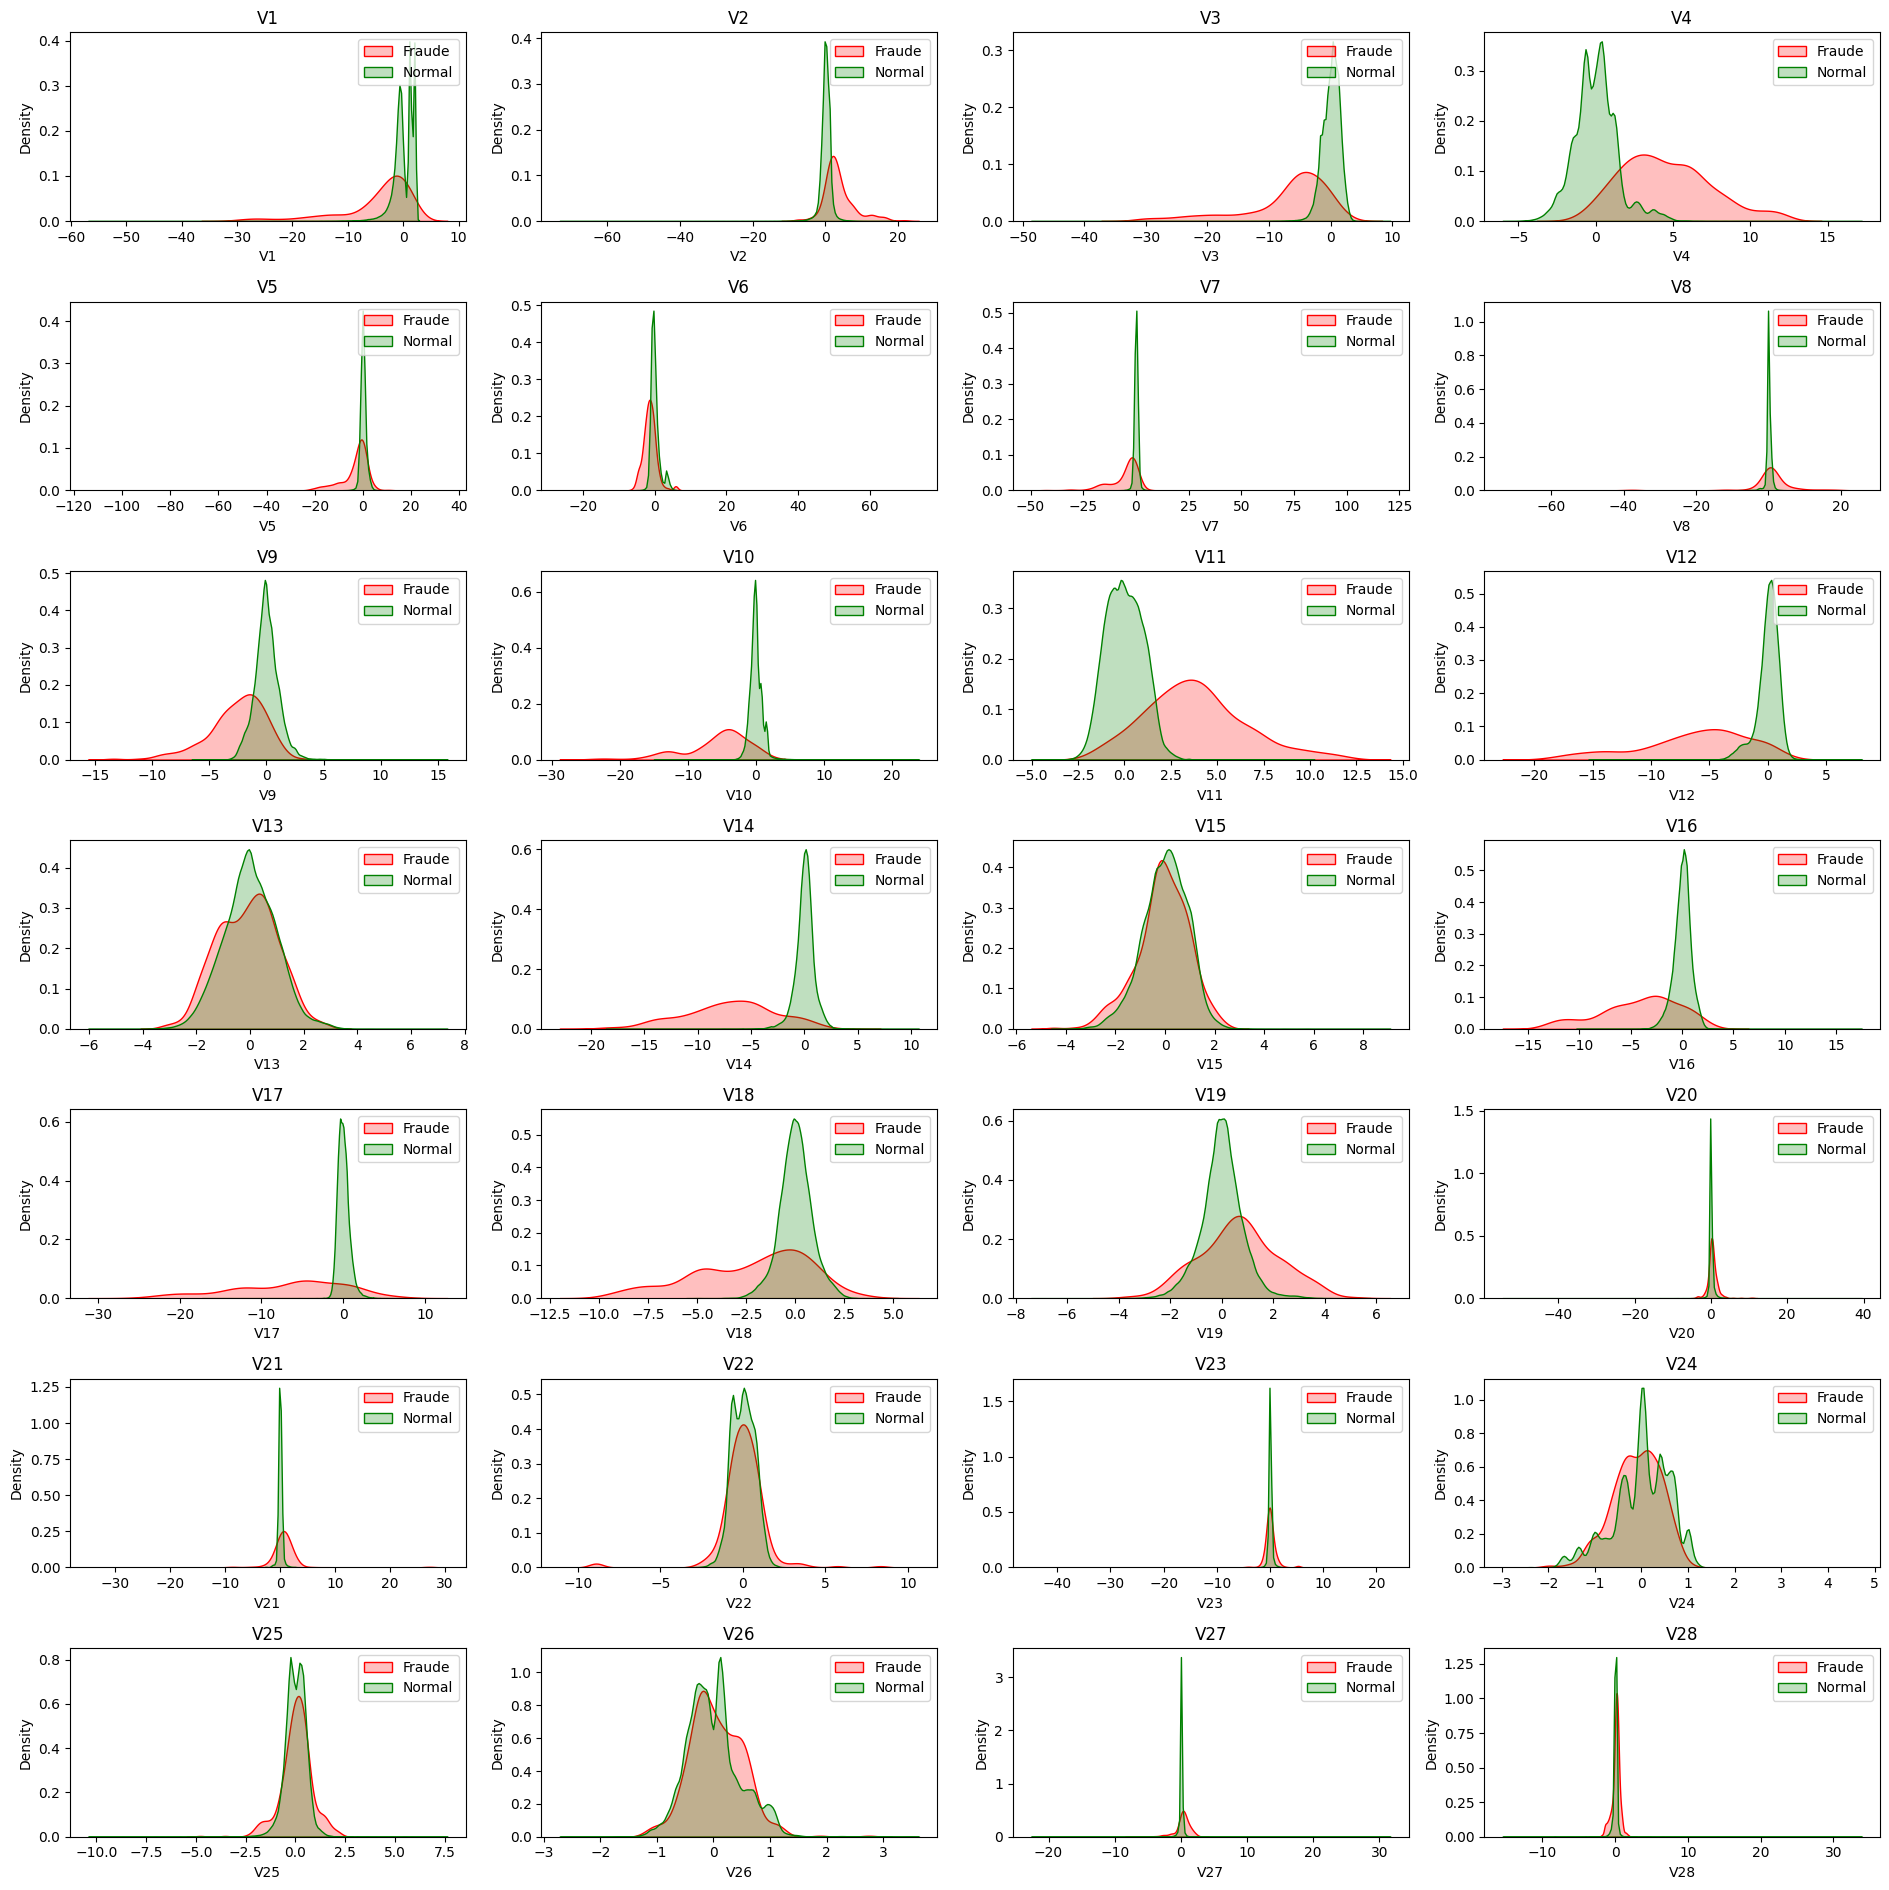

In [ ]:
colunas_feature = df.drop(columns=['Class','Time','Amount'])
df_fraude = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

fig, ax = plt.subplots(7,4, figsize=(19,19))
for i, col in enumerate(colunas_feature.columns):
  plt.subplot(7,4,i+1)
  sns.kdeplot(data=df_fraude, x=col, color='red', fill=True)
  sns.kdeplot(data=df_normal, x=col, color='green', fill=True)
  plt.legend(['Fraude', 'Normal'])
  plt.title(col)
  plt.tight_layout()


## Verificar a distribuição das classes (Fraude/Normal)

Class
0    284315
1       492
Name: count, dtype: int64

Fraudes representam 0.1727% do dataset.



Text(0.5, 1.0, 'Distribuição das classes')

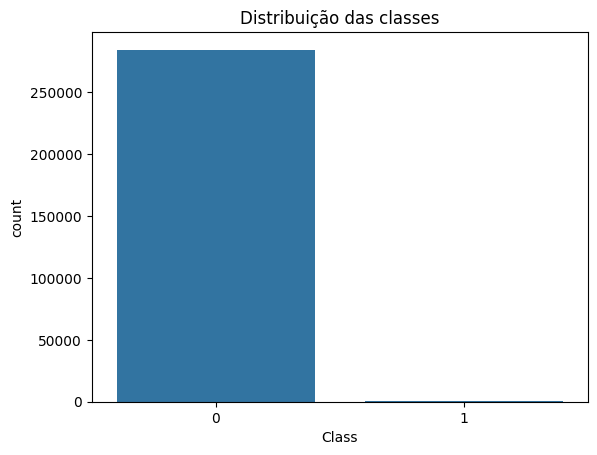

In [ ]:
# Ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Representação visual
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('Distribuição das classes')




## Grafico visando achar tendencias em relação ao Tempo/Valores para transações fraudulentas

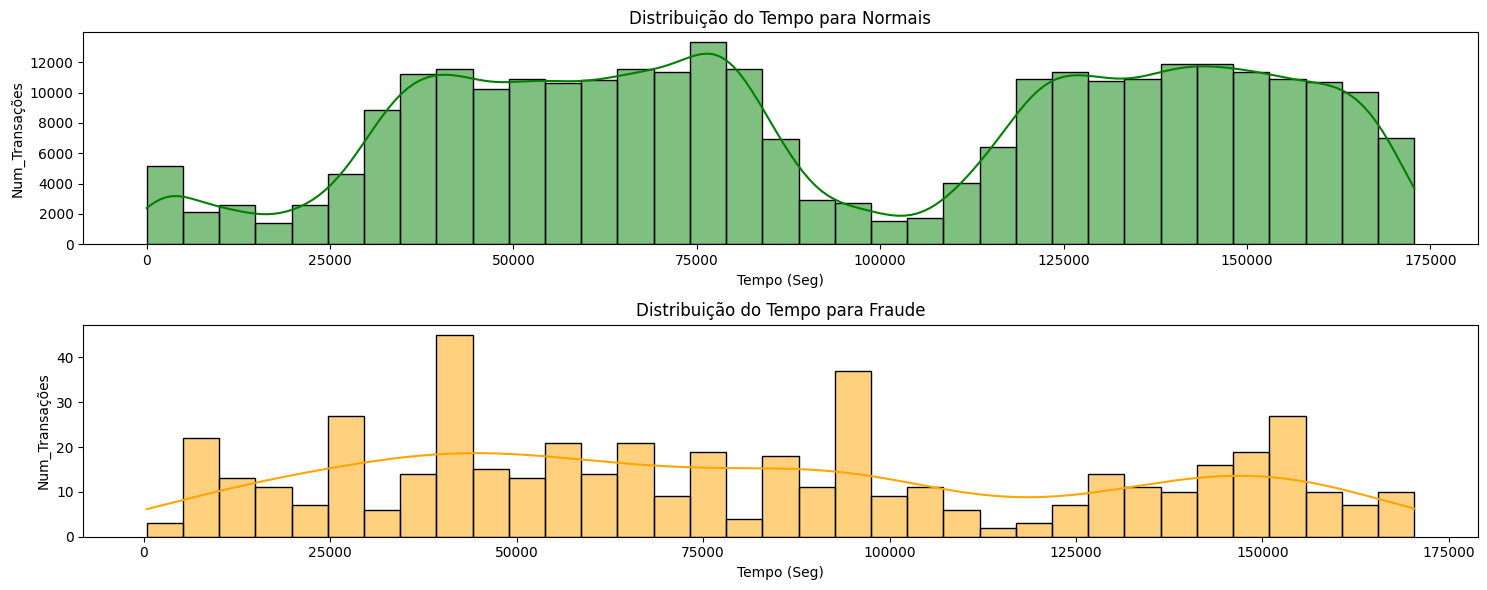

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,6))
sns.histplot(data=df[df['Class'] == 0], x='Time', ax=ax[0], color='green', kde=True,bins=35)
ax[0].set_title('Distribuição do Tempo para Normais')
ax[0].set_ylabel('Num_Transações')
ax[0].set_xlabel('Tempo (Seg)')
sns.histplot(data=df[df['Class'] == 1], x='Time', ax=ax[1], color='orange', kde=True,bins=35)
ax[1].set_title('Distribuição do Tempo para Fraude')
ax[1].set_ylabel('Num_Transações')
ax[1].set_xlabel('Tempo (Seg)')
plt.tight_layout()

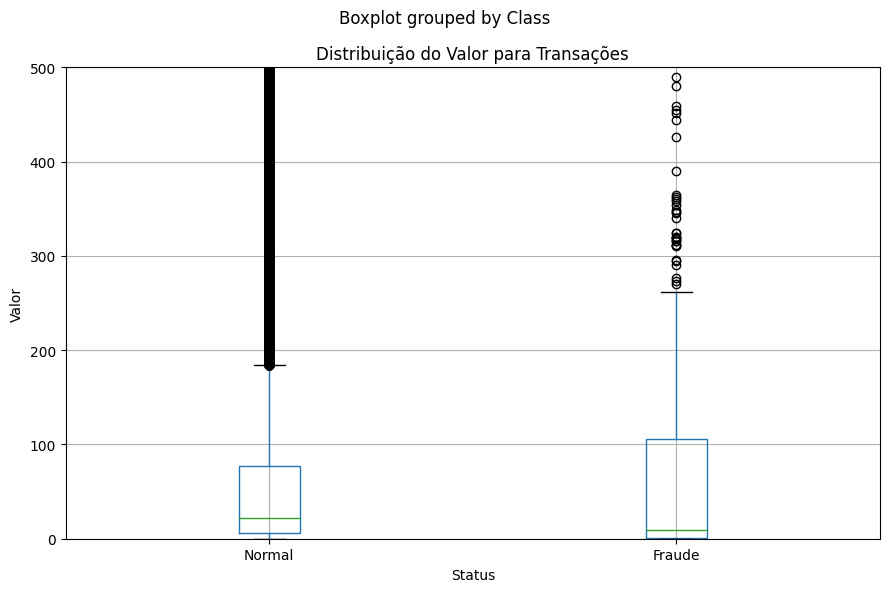

In [ ]:
fig, ax = plt.subplots(figsize=(9,6),sharex=True)
df.boxplot(column='Amount', by='Class', ax=ax)
ax.set_title('Distribuição do Valor para Transações')
ax.set_ylabel('Valor')
ax.set_xlabel('Status')
ax.set_xticklabels(['Normal', 'Fraude'])
ax.set_ylim(0,500)
plt.tight_layout()

##Nesse BoxPlot deu pra perceber que as transações fraudulentas tem a tendencia a ter uma média de maior valor



## Descrição dos valores das transações fraudulentas e das normais

In [ ]:
print(df_fraude['Amount'].describe())
print("---------")
print(df_normal['Amount'].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
---------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados

In [ ]:
# Normalizando os dados de tempo e quantia
StandardScaler(copy=True).fit_transform(df[['Time','Amount']])
df_transformado = df.copy()
df_transformado['Time'] = StandardScaler(copy=True).fit_transform(df[['Time']])
df_transformado['Amount'] = StandardScaler(copy=True).fit_transform(df[['Amount']])

In [ ]:
# Dividindo o modelo em treino e teste
x = df_transformado.drop(columns=['Class'])
y = df_transformado['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=47, shuffle=True, stratify=y)

In [ ]:
# Balanceando o modelo
smote = SMOTE(sampling_strategy=0.1,random_state=47)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

Text(0.5, 1.0, 'Balanceado')

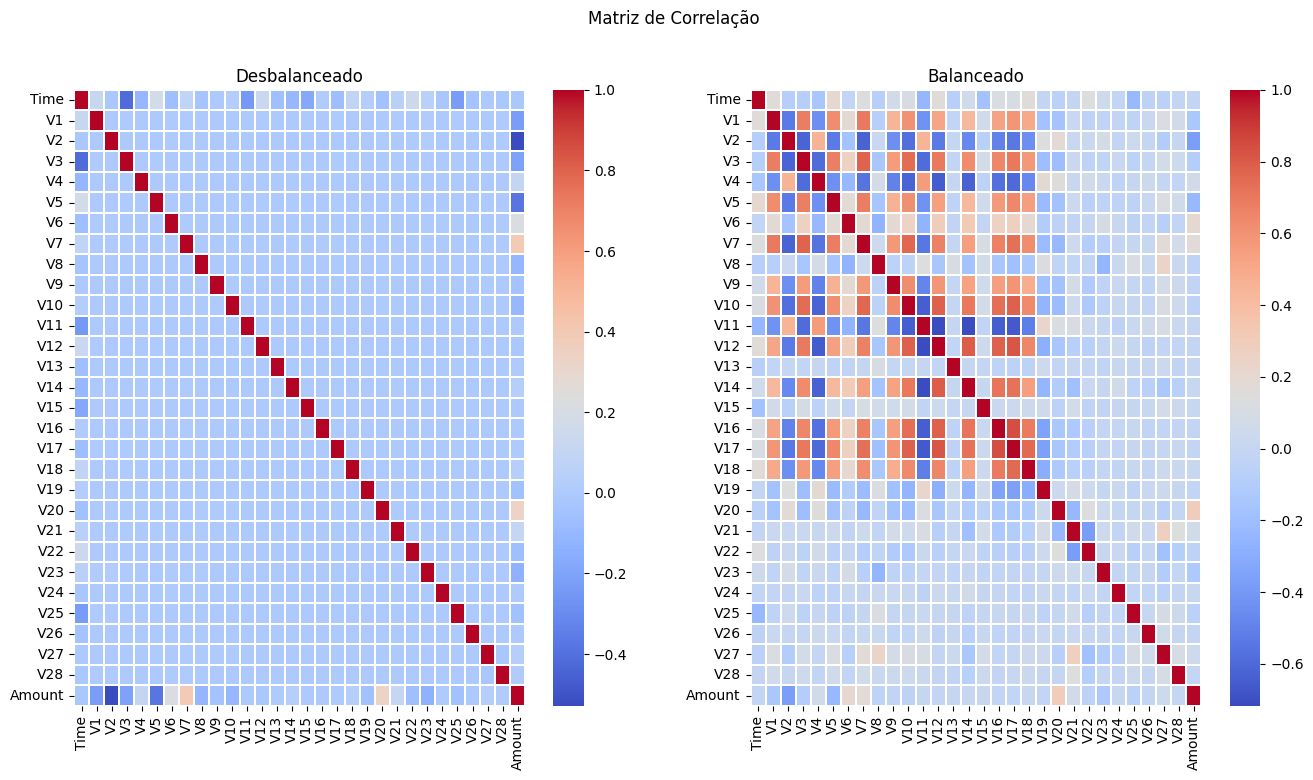

In [ ]:
# plotar a matriz de correlação

corr = x_train.corr()
corr_rus = pd.DataFrame(x_train_smote).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

## Após o balanceamento, o modelo pôde calibrar melhor as variáveis

## Modelo de Machine Learning

* Construir um modelo para **classificação**.


In [ ]:
# Gerando um modelo de regressão logistica
logistic_model = LogisticRegression(random_state=47,class_weight='balanced')
logistic_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=47)

## Como é visado ter um baixissimo indice de fraudes, colocando um limiar altissimo, o modelo será muito mais conservador nos seus palpites, ou seja, há muito mais valor em bloquear uma fraude, mesmo que classifique algumas transações normais como fraude

In [ ]:
# Testando o modelo no conjunto de dados de treino
proba = logistic_model.predict_proba(x_train)[:,1]
limiar = 0.99999
y_pred = (proba > limiar)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

0.9993504356031513
[[227392     59]
 [    89    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.77      0.80       394

    accuracy                           1.00    227845
   macro avg       0.92      0.89      0.90    227845
weighted avg       1.00      1.00      1.00    227845



## Avaliar o desempenho do modelo

* Utilizar os relatórios dos resultados do modelo para avalia-lo


A acurácia do modelo foi de : 99.9420666409185%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

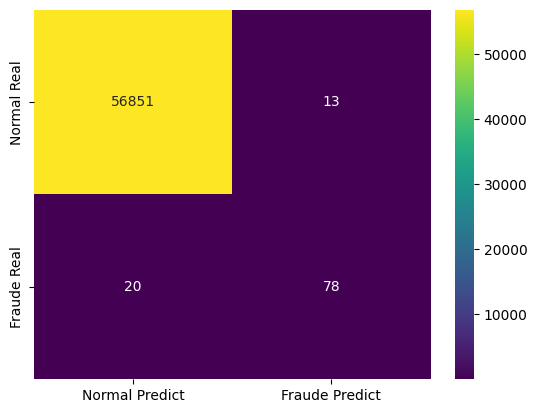

In [ ]:
# Testando o modelo no conjunto de dados de teste

proba = logistic_model.predict_proba(x_test)[:,1]
limiar = 0.99999
y_pred = (proba > limiar)
print(f'A acurácia do modelo foi de : {((accuracy_score(y_test, y_pred))* 100)}%')
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(matrix)
sns.heatmap(confusion_matrix_display.confusion_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=['Normal Predict', 'Fraude Predict'], yticklabels=['Normal Real', 'Fraude Real'])




### Vale lembrar que a acurácia pode enganar, pois como há um grande número de dados(normais), e o objetivo do modelo é classificar os fraudulentos, ele pode errar muitos fraudulentos e acertar os normais, logo tendo uma acurácia altissima.

# Conclusão

## Com esse modelo de regressão logistica, foi possivel obter uma boa estimativa para fraudes, onde ele acerta com uma alta taxa as transações fraudulentas, e além disso não cria muitos falsos negativos, o que é ótimo, pois evita a dor de cabeça de ter o cartão bloqueado.